# 1. Functions, libraries and packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import kaggle

In [2]:
def dataframe_info(df: pd.DataFrame):
    """
    Generate a summary DataFrame containing metadata about the columns of the input DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        pd.DataFrame: A summary DataFrame with the following columns:
            - Column_name: Name of each column.
            - Total records: Total number of records in each column.
            - Missing Values: Number of missing (NaN) values in each column.
            - Data type: Data type of each column.
            - Unique values: Number of unique values in each column.
    """
    df_summary = pd.DataFrame({
        'Column_name': df.columns,
        'Total records': [df[col].size for col in df.columns],
        'Missing Values': [df[col].isna().sum() for col in df.columns],
        'Data type': [df[col].dtype for col in df.columns],
        'Unique values': [df[col].nunique() for col in df.columns]
    })

    return df_summary

# 2. Data import

In [3]:
kaggle.api.authenticate()
kaggle.api.dataset_download_files('teertha/ushealthinsurancedataset', path = './data', unzip = True)

Dataset URL: https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset


In [4]:
df = pd.read_csv(r'data/insurance.csv')

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 3. EDA

In [6]:
dataframe_info(df = df).sort_values(by='Unique values', ascending=True)

,Column_name,Total records,Missing Values,Data type,Unique values
1,sex,1338,0,object,2
4,smoker,1338,0,object,2
5,region,1338,0,object,4
3,children,1338,0,int64,6
0,age,1338,0,int64,47
2,bmi,1338,0,float64,548
6,charges,1338,0,float64,1337


C:\Users\ondra\AppData\Roaming\Python\Python313\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


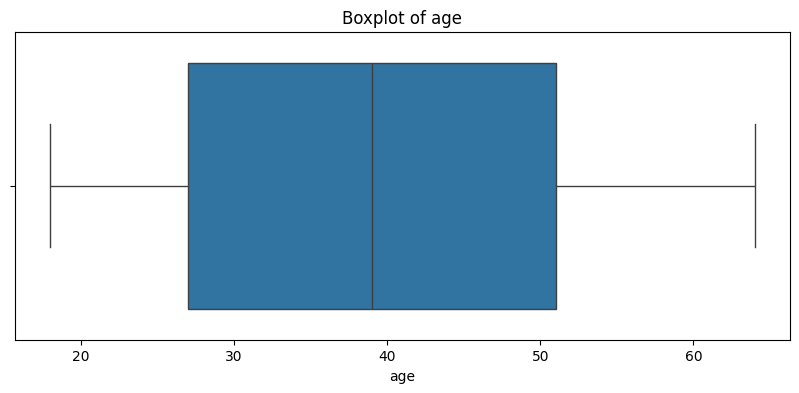

C:\Users\ondra\AppData\Roaming\Python\Python313\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


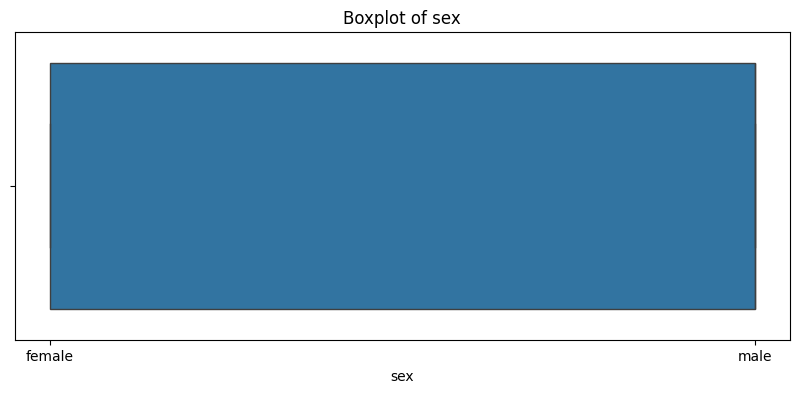

C:\Users\ondra\AppData\Roaming\Python\Python313\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


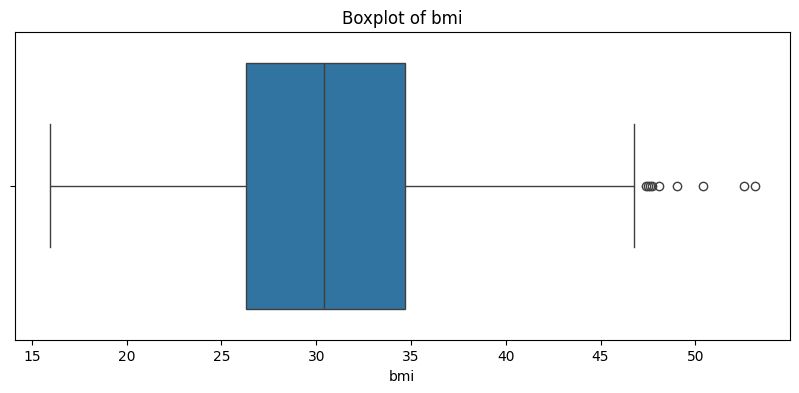

C:\Users\ondra\AppData\Roaming\Python\Python313\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


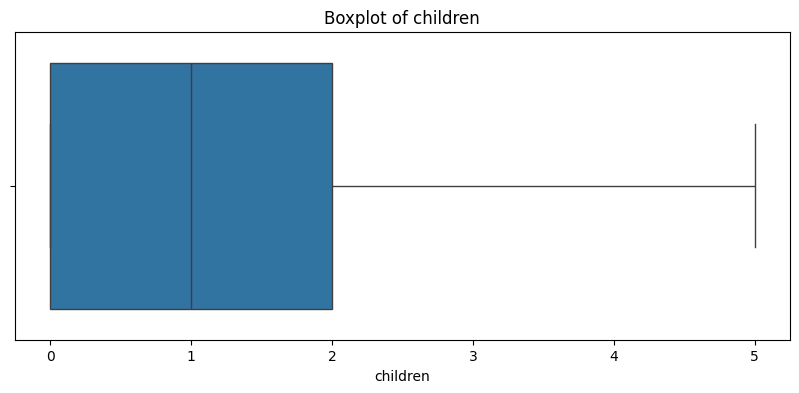

C:\Users\ondra\AppData\Roaming\Python\Python313\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


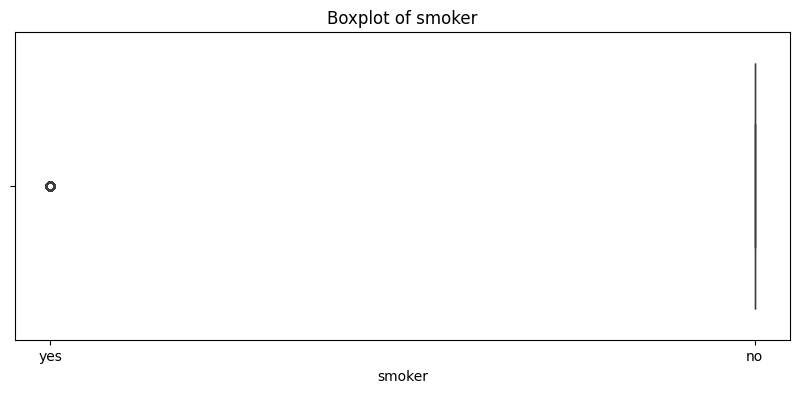

C:\Users\ondra\AppData\Roaming\Python\Python313\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


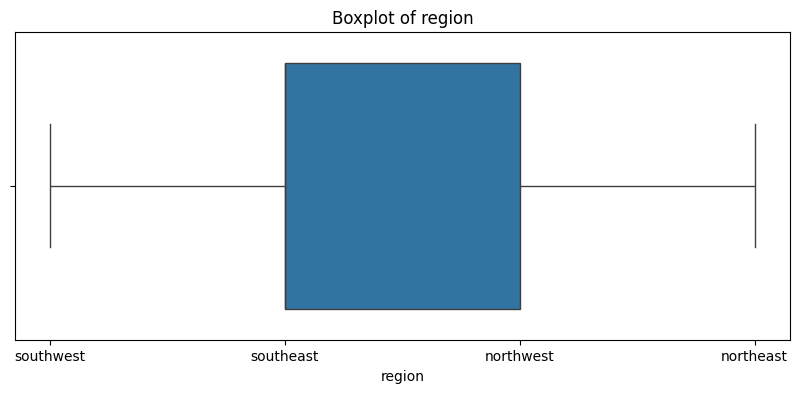

C:\Users\ondra\AppData\Roaming\Python\Python313\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


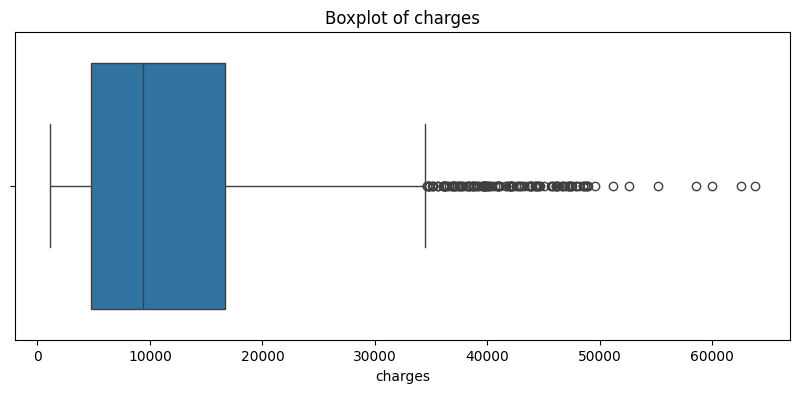

In [7]:
for col in df.columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col], orient='v')
    plt.title(f'Boxplot of {col}')
    plt.show()
    plt.close()

In [8]:
df.select_dtypes(include=['object']).columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [9]:
df['sex'].value_counts()
#binary encoding


sex
male      676
female    662
Name: count, dtype: int64

In [10]:
df['smoker'].value_counts()
#binary encoding

smoker
no     1064
yes     274
Name: count, dtype: int64

In [11]:
df['region'].value_counts()
#one-hot encoding

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

# 4. Encoding

In [12]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = pd.Categorical(df[col])

In [13]:
df['sex'] = df['sex'].apply(lambda x: 1 if x == 'male' else 0)
df['smoker'] = df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)


In [14]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [15]:
df = pd.get_dummies(df, columns=['region'], drop_first=True, dtype=int)

In [16]:
df

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,1,0,0
1334,18,0,31.920,0,0,2205.98080,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,1


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'children'}>],
       [<Axes: title={'center': 'charges'}>,
        <Axes: title={'center': 'region_northwest'}>,
        <Axes: title={'center': 'region_southeast'}>],
       [<Axes: title={'center': 'region_southwest'}>, <Axes: >, <Axes: >]],
      dtype=object)

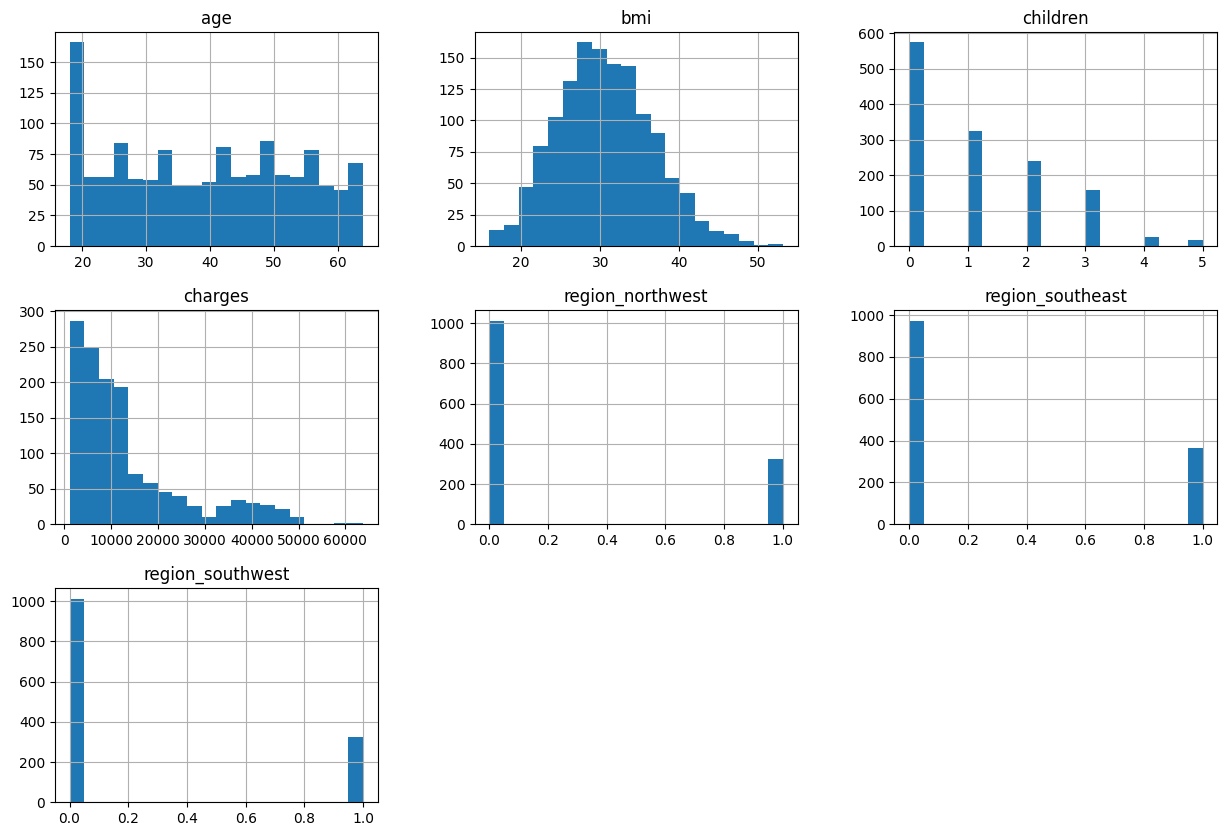

In [17]:
df.hist(bins=20, figsize=(15, 10))

In [18]:
for col in df.select_dtypes(include=['category']):
    df[col] = df[col].astype('int')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northwest  1338 non-null   int64  
 7   region_southeast  1338 non-null   int64  
 8   region_southwest  1338 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 94.2 KB


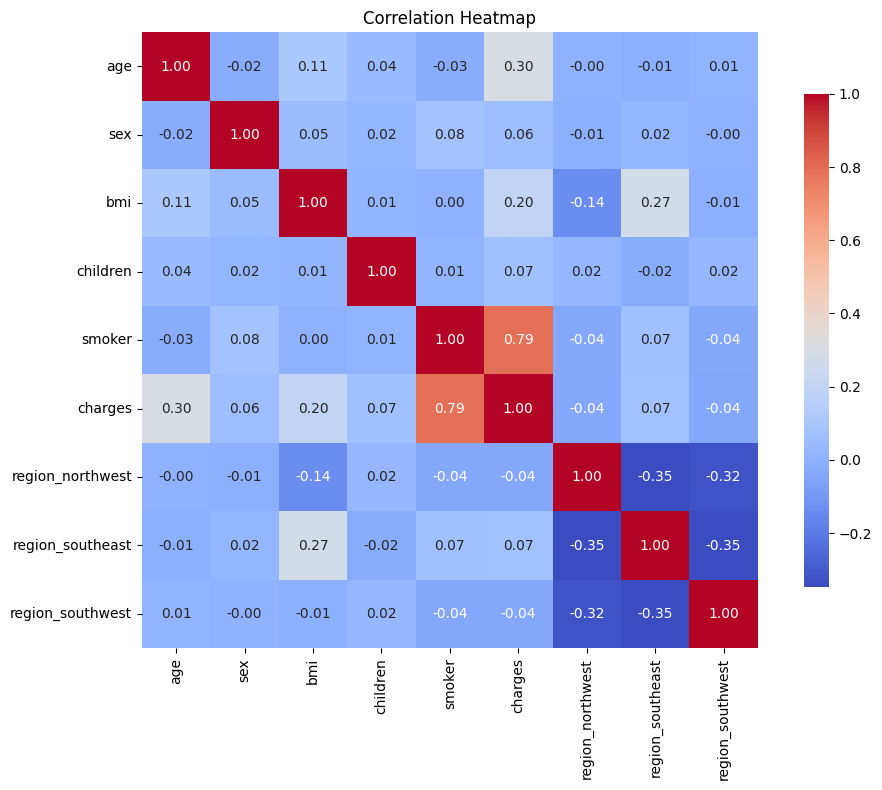

In [20]:
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

# 5. Train

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

In [24]:
X, y = df.drop(columns=['charges']), df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 856
Validation set size: 214
Test set size: 268


In [25]:
model = RandomForestRegressor(n_jobs = -1, random_state = 42)

In [26]:
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [28]:
y_pred = model.predict(X_val)

In [29]:
rmse = root_mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
print(f'RMSE: {rmse:2f}')
print(f'MAE: {mae:2f}')

RMSE: 5529.829517
MAE: 2898.188136


In [31]:
df.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

Text(0.5, 1.0, 'Actual vs Predicted Charges')

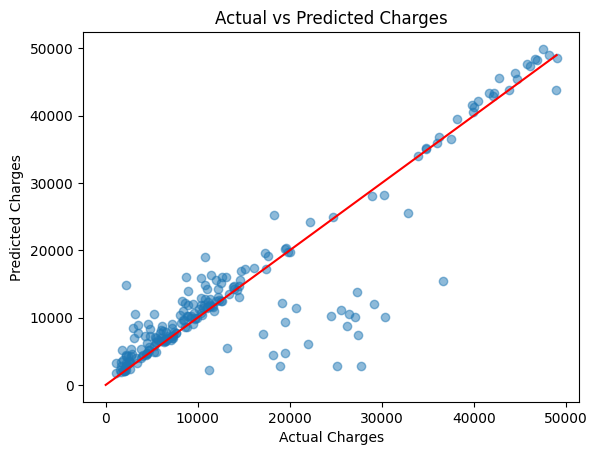

In [37]:
plt.scatter(y_val, y_pred, alpha = 0.5)
plt.plot(np.linspace(0,max(y_val)), np.linspace(0,max(y_val)), color = 'red')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')

In [40]:
importances = model.feature_importances_
df_importances = pd.DataFrame(
    {'Feature': X_train.columns,
     'Importances': importances}
)
df_importances = df_importances.sort_values( by = 'Importances', ascending= False)

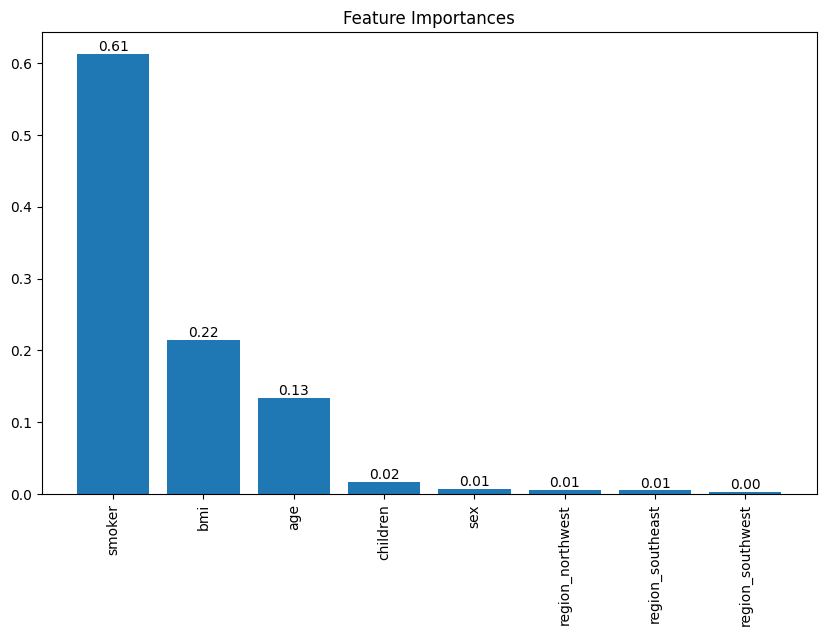

In [42]:
plt.figure(figsize=(10,6))
plt.bar(df_importances['Feature'], df_importances['Importances'])
plt.xticks(rotation=90)
plt.title('Feature Importances')
plt.bar_label(plt.gca().containers[0], fmt='%.2f')
plt.show()